In [10]:
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt

#If you are utilizing Google Colab, execute the following two code cells. If you are running this code on your local machine, deactivate the subsequent two cells and activate the cell following them. In both scenarios, customize the path according to your specific case.

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#data = np.load('/content/drive/MyDrive/Colab Notebooks/UMass_ECE601_Spring24/HW2_part1/arrays_2.npz')

In [13]:
save_directory = '"/home/achin/Documents/git repos/ECE601/HW#2 Due Date Feb 13/HW2_ECE601'
npz_file_path = os.path.join(save_directory, 'arrays.npz')

# Load the arrays from the file
data = np.load("/home/achin/Documents/git repos/ECE601/HW#2 Due Date Feb 13/HW2_ECE601/arrays_2.npz")

In [14]:
# Extract arrays using the keys used during saving (x_train, y_train, x_test, y_test)
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

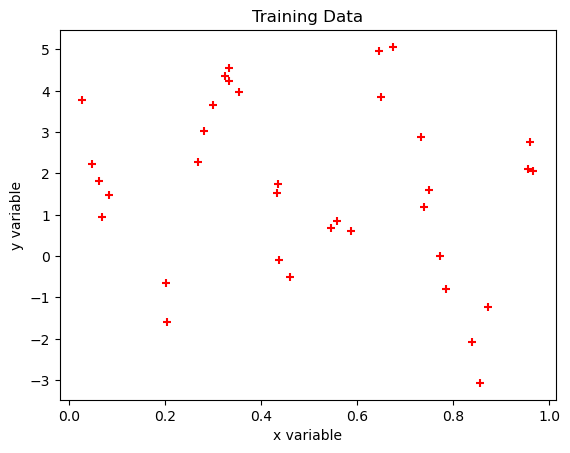

In [15]:
# Plot the traing data points
plt.scatter(x_train, y_train, marker='+', c='r')
# Set the title
plt.title("Training Data")
# Set the y-axis label
plt.ylabel('y variable')
# Set the x-axis label
plt.xlabel('x variable')
plt.show()

Let's define our model. The model is given by
     $$ f(x;w)=\sum_{j=0}^{n} w_j f_j(x), $$
      where $f_j(x)=\cos (2 j\pi x)$.

In [16]:
def f_j(x, j):
    return np.cos(2 * j* np.pi * x)

In [17]:
def f_cosine(x,w):
    n = len(w)-1
    my_sum=0
    for j in range(0,n+1):
        my_sum+=w[j]*f_j(x,j)
    return my_sum

Note that in this setting, the weight vector
$$w=[w_0, w_1, w_2, \cdots, w_n]$$
has $n+1$ elements. Thus, $n=length(w)-1$. Let's write the function to compute the cost function.
 $$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m} \sum_{i=1}^{m} \left[\sum_{j=0}^{n} w_j f_j(x^{(i)}) - y^{(i)} \right]^2$$

In [18]:
def compute_cost(x, y, w):
    """
    """
    m = len(x)
    n = len(w)-1


    # computation for the model's predictions
    f_w_n = f_cosine(x,w)

    # Vectorized computation for the cost
    total_cost = 1 / (2 * m) * np.sum((f_w_n - y) ** 2)

    return total_cost

The gradient is given by:
$$\frac{dJ}{dw_j} = \frac{1}{m} \sum_{i=1}^{m} f_j(x^{(i)}) (\hat{y}^{(i)} - y^{(i)}) , \ \ j=0,1,2, \cdots, n $$

In [19]:
def compute_gradient(x, y, w):

    m = len(x)
    n = len(w)-1

    y_hat = f_cosine(x,w)


    error = y_hat - y


    dj_dw=np.zeros(n+1)

    for j in range(n+1):
        dj_dw[j] = np.sum(error*f_j(x, j)) / m


    return dj_dw

In [20]:
def my_model_fit(x_train, y_train,n):
    """
    uses gradient descent to fit the model to training data
    Args:

    """
    m = len(x_train)
    alpha=.01
    w_hat=np.zeros(n+1)
    d=10

    max_iteration_count=5000
    iteration_number=0

    while (d>.001) or (iteration_number< max_iteration_count):
        dj_dw=compute_gradient(x_train, y_train, w_hat)
        d=np.max(np.abs(dj_dw))
        w_hat=w_hat-alpha*dj_dw
        iteration_number+=1

    return w_hat

Let's compute the trainning and test errors for different values of $n=0,1,\cdots, 6$.

In [21]:
training_errors=[]
test_errors=[]
n_values=range(0,7)

for n in n_values:
    w_hat=my_model_fit(x_train, y_train,n)
    training_errors.append(compute_cost(x_train, y_train, w_hat))
    test_errors.append(compute_cost(x_test, y_test, w_hat))

rounded_training_errors=[round(x, 3) for x in training_errors]
rounded_test_errors=[round(x, 3) for x in test_errors]
print('training_errors=',rounded_training_errors)
print('test_errors=', rounded_test_errors)

training_errors= [np.float64(2.139), np.float64(2.047), np.float64(2.046), np.float64(0.154), np.float64(0.15), np.float64(0.147), np.float64(0.146)]
test_errors= [np.float64(3.355), np.float64(3.316), np.float64(3.288), np.float64(0.251), np.float64(0.287), np.float64(0.315), np.float64(0.33)]


As we note in the above results, a sharp decline in the training error is observed for $n=3$, at which point the minimum test error is observed. Therefore, it seems that the value $n=3$ is probably a good choice here. Let's plot these values to gain a better understanding.

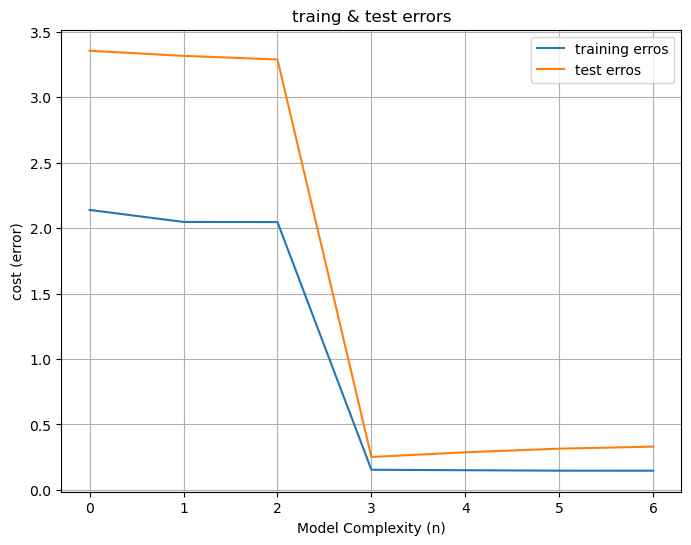

In [22]:
# model complexity graph  (also referred to as validation curve, fitting graph, or fitting curve).

import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_values, training_errors, label="training erros")
plt.title("traing & test errors")
plt.xlabel("Model Complexity (n)")
plt.ylabel("cost (error)")
plt.grid(True)
plt.plot(n_values, test_errors, label="test erros")
plt.legend()
plt.show()

Let's plot the data against the fitted model for different values of n=0,1,2,...,6. This is again helping us better observe underfitting for small values of $n$ and overfitting for large values of $n$.

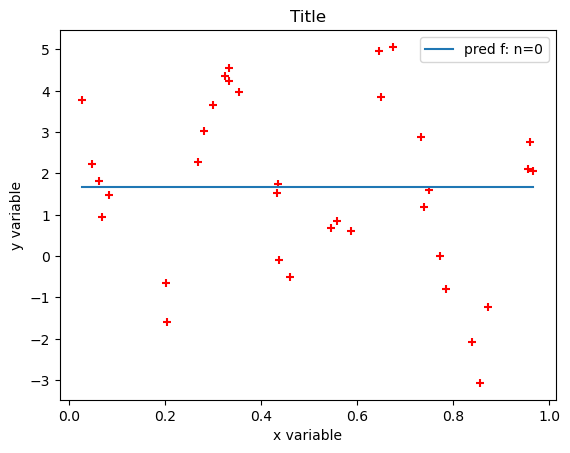

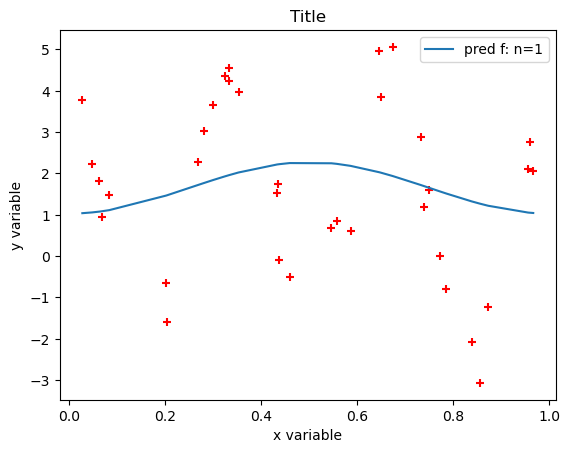

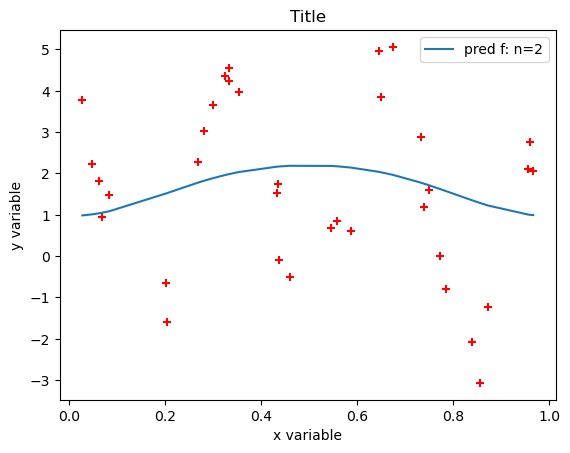

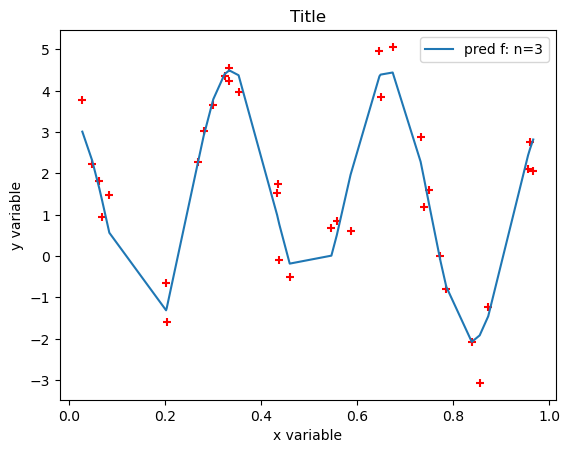

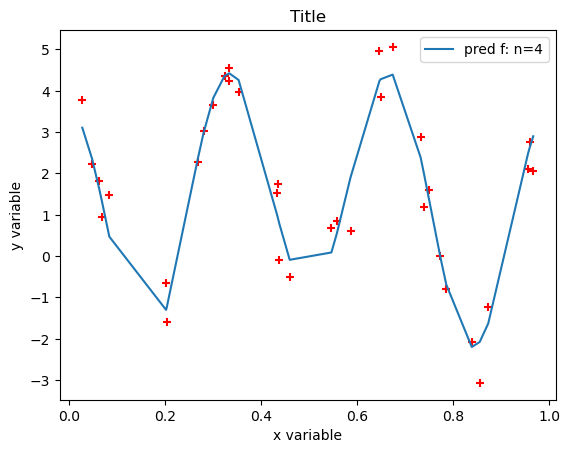

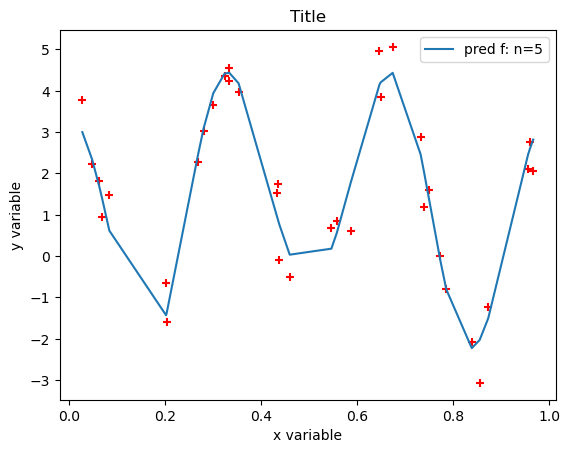

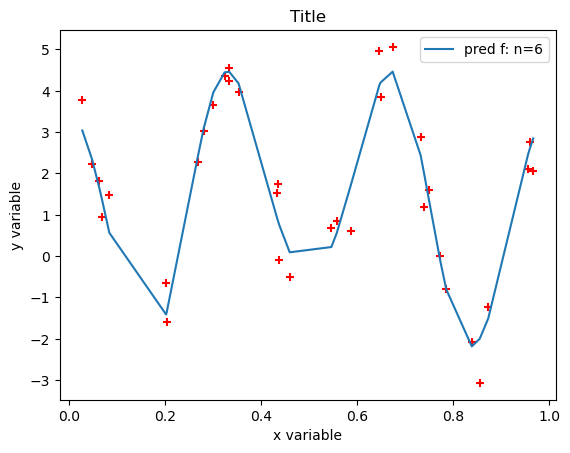

In [23]:
n_values=range(0,7)
x_sorted=np.sort(x_train)


for n in n_values:
    w_hat=my_model_fit(x_train, y_train,n)
    #plot
    plt.scatter(x_train, y_train, marker='+', c='r')
    y_pred=f_cosine(x_sorted,w_hat)
    plt.plot(x_sorted, y_pred, label=f"pred f: n={n}")
    # Set the title
    plt.title("Title")
    # Set the y-axis label
    plt.ylabel('y variable')
    # Set the x-axis label
    plt.xlabel('x variable')
    plt.legend()
    plt.show()

<span style="font-size:25px;">Regularization:</span>

Let's now solve the same problem using regularization. Remember that our cost function, including the regularization term is given by:

$$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$$

The partial derivatives thus become
$$\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot \frac{\partial \hat{y}^{(i)}}{\partial w_j} + \frac{\lambda}{m} w_j$$

In [24]:

def compute_reg_gradient(x, y, w, lambda_reg):

    m = len(x)
    n = len(w)-1

    y_hat = f_cosine(x,w)


    error = y_hat - y


    dj_dw=np.zeros(n+1)

    for j in range(n+1):
        dj_dw[j] = np.sum(error*f_j(x, j)) / m+lambda_reg/m*w[j]


    return dj_dw

In [25]:
def my_model_reg_fit(x_train, y_train,n, lambda_reg):
    """
    uses gradient descent to fit the model to training data
    Args:

    """
    m = len(x_train)
    alpha=.01
    w_hat=np.zeros(n+1)
    d=10

    max_iteration_count=5000
    iteration_number=0

    while (d>.001) or (iteration_number< max_iteration_count):
        dj_dw=compute_reg_gradient(x_train, y_train, w_hat,lambda_reg)
        d=np.max(np.abs(dj_dw))
        w_hat=w_hat-alpha*dj_dw
        iteration_number+=1

    return w_hat

In [26]:
n=6
lambda_reg=0.1
w_hat=my_model_reg_fit(x_train, y_train,n,lambda_reg)
training_error_reg=compute_cost(x_train, y_train, w_hat)
test_error_reg=compute_cost(x_test, y_test, w_hat)

print('w_values=',w_hat)
print('training_error_reg=',training_error_reg)
print('test_error_reg=', test_error_reg)

w_values= [ 1.20495831 -0.76197356  0.04219373  2.82667504  0.19752578 -0.18437192
  0.05956103]
training_error_reg= 0.14640746752317396
test_error_reg= 0.3359238882581077
